<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#combining-the-dataset" data-toc-modified-id="combining-the-dataset-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>combining the dataset</a></span></li><li><span><a href="#calculated-columns" data-toc-modified-id="calculated-columns-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>calculated columns</a></span></li><li><span><a href="#Which&nbsp;product&nbsp;generates-the-highest-sales-revenue?" data-toc-modified-id="Which&nbsp;product&nbsp;generates-the-highest-sales-revenue?-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Which&nbsp;product&nbsp;generates the highest sales revenue?</a></span></li><li><span><a href="#Which&nbsp;region&nbsp;shows-the-strongest-month-on-month-growth?" data-toc-modified-id="Which&nbsp;region&nbsp;shows-the-strongest-month-on-month-growth?-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Which&nbsp;region&nbsp;shows the strongest month-on-month growth?</a></span></li><li><span><a href="#Does-higher&nbsp;marketing-spend&nbsp;lead-to-higher-sales?" data-toc-modified-id="Does-higher&nbsp;marketing-spend&nbsp;lead-to-higher-sales?-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Does higher&nbsp;marketing spend&nbsp;lead to higher sales?</a></span></li><li><span><a href="#Where-are&nbsp;inventory-levels&nbsp;too-low-or-too-high?" data-toc-modified-id="Where-are&nbsp;inventory-levels&nbsp;too-low-or-too-high?-2.0.6"><span class="toc-item-num">2.0.6&nbsp;&nbsp;</span>Where are&nbsp;inventory levels&nbsp;too low or too high?</a></span></li><li><span><a href="#Are-there-correlations-between&nbsp;adverse-events&nbsp;and-sales-volumes?" data-toc-modified-id="Are-there-correlations-between&nbsp;adverse-events&nbsp;and-sales-volumes?-2.0.7"><span class="toc-item-num">2.0.7&nbsp;&nbsp;</span>Are there correlations between&nbsp;adverse events&nbsp;and sales volumes?</a></span></li><li><span><a href="#Which-territories-show-unusual-fluctuations-in-performance?" data-toc-modified-id="Which-territories-show-unusual-fluctuations-in-performance?-2.0.8"><span class="toc-item-num">2.0.8&nbsp;&nbsp;</span>Which territories show unusual fluctuations in performance?</a></span></li></ul></li></ul></li><li><span><a href="#Visualisations" data-toc-modified-id="Visualisations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualisations</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Sales-trend-over-time" data-toc-modified-id="Sales-trend-over-time-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Sales trend over time</a></span></li><li><span><a href="#Top-5-territories-by-revenue" data-toc-modified-id="Top-5-territories-by-revenue-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Top 5 territories by revenue</a></span></li><li><span><a href="#Marketing-vs-Sales-correlation" data-toc-modified-id="Marketing-vs-Sales-correlation-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Marketing vs Sales correlation</a></span></li><li><span><a href="#Inventory-vs-Shipments-balance" data-toc-modified-id="Inventory-vs-Shipments-balance-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Inventory vs Shipments balance</a></span></li></ul></li></ul></li></ul></div>

## Data Preparation

In [118]:
import pandas as pd
import numpy as np

In [119]:
import os
import pandas as pd

path = r"C:/Users/Tanu/Documents/manish learning/pyhton/python learnign/project 3 tanu/Pharma_Insights_Pandas_Project/data/"

# Get all CSV filenames in the folder
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]

# Create a dictionary of DataFrames named after the CSV filenames (without .csv)
dfs = {os.path.splitext(f)[0]: pd.read_csv(os.path.join(path, f)) for f in csv_files}

# Check loaded names
print("DataFrames created:")
print(list(dfs.keys()))


DataFrames created:
['adverse_events', 'combined_database', 'combined_database2', 'customers', 'digital_engagement', 'inventory_snapshots', 'marketing_spend', 'products', 'sales_orders', 'shipments', 'territories', 'weather']


In [120]:
dfs['adverse_events'].head()

,ae_id,report_date,product_id,territory_id,event_term,severity,outcome
0,AE64568903,2024-05-09,D101,T09,Fatigue,Moderate,Recovered
1,AE90935197,2024-02-26,D101,T08,Abdominal pain,Moderate,Recovered
2,AE92574604,2024-12-05,D102,T01,Rash,Moderate,Hospitalized
3,AE85827917,2024-02-25,D100,T04,Rash,Moderate,Recovered
4,AE98503102,2025-05-23,D102,T06,Abdominal pain,Mild,Hospitalized


In [121]:
#changing object type to datetype
import re


DAY_FIRST = False   # false as year first

date_name_pattern = re.compile(r"(date|dt|time|timestamp)", re.I)

def coerce_dates_in_df(df: pd.DataFrame) -> tuple[pd.DataFrame, list[str]]:
    df = df.copy()
    # find likely date columns by name
    date_cols = [c for c in df.columns if date_name_pattern.search(c)]
    for c in date_cols:
        # standard clean-up before parsing
        if df[c].dtype == "object":
            df[c] = df[c].astype("string").str.strip()
            df[c] = df[c].replace({"": pd.NA})  # empty -> NA
        # coerce to datetime (invalid -> NaT)
        df[c] = pd.to_datetime(df[c], errors="coerce", dayfirst=DAY_FIRST)
    return df, date_cols

converted = {}
date_report = []

for name, df in dfs.items():
    cleaned, used_cols = coerce_dates_in_df(df)
    converted[name] = cleaned
    # collect simple per-file stats
    for c in used_cols:
        date_report.append({
            "file": name,
            "column": c,
            "dtype_after": str(cleaned[c].dtype),
            "num_missing_after": int(cleaned[c].isna().sum()),
            "total_rows": int(len(cleaned))
        })

date_report_df = pd.DataFrame(date_report)
print("Per-date-column conversion report:")
print(date_report_df if not date_report_df.empty else "No date-like columns detected.")

Per-date-column conversion report:
                   file         column     dtype_after  num_missing_after  total_rows
0        adverse_events    report_date  datetime64[ns]                  0        2000
1     combined_database     order_date  datetime64[ns]                  0       10107
2     combined_database    launch_date  datetime64[ns]                  0       10107
3    combined_database2     order_date  datetime64[ns]                  0       10079
4    combined_database2    launch_date  datetime64[ns]                  0       10079
5    digital_engagement           date  datetime64[ns]                  0       20100
6   inventory_snapshots  snapshot_date  datetime64[ns]                  0        2880
7              products    launch_date  datetime64[ns]                  0           3
8          sales_orders     order_date  datetime64[ns]                  0       10079
9             shipments      ship_date  datetime64[ns]                  0        6720
10              wea

In [122]:
dfs = converted  # now dfs contain real datetime columns


In [123]:
df_adverse = dfs['adverse_events']
df_adverse

,ae_id,report_date,product_id,territory_id,event_term,severity,outcome
0,AE64568903,2024-05-09,D101,T09,Fatigue,Moderate,Recovered
1,AE90935197,2024-02-26,D101,T08,Abdominal pain,Moderate,Recovered
2,AE92574604,2024-12-05,D102,T01,Rash,Moderate,Hospitalized
3,AE85827917,2024-02-25,D100,T04,Rash,Moderate,Recovered
4,AE98503102,2025-05-23,D102,T06,Abdominal pain,Mild,Hospitalized
...,...,...,...,...,...,...,...
1995,AE63399624,2025-01-10,D100,T03,Dizziness,Mild,Recovered
1996,AE41999671,2025-02-04,D100,T10,Nausea,Severe,Recovered
1997,AE21600117,2024-08-26,D101,T05,Rash,Moderate,Recovered
1998,AE53232741,2025-02-01,D101,T10,Nausea,Moderate,Recovered


In [124]:
df_customers = dfs['customers']


In [125]:
df_digi_eng = dfs['digital_engagement']
df_inv_snap = dfs['inventory_snapshots']
df_mark_spend = dfs['marketing_spend']

In [126]:
df_inv_snap

,snapshot_date,product_id,territory_id,on_hand_units
0,2024-01-01,D100,T01,912
1,2024-01-01,D100,T02,1058
2,2024-01-01,D100,T03,1256
3,2024-01-01,D100,T04,853
4,2024-01-01,D100,T05,1196
...,...,...,...,...
2875,2025-10-27,D102,T06,982
2876,2025-10-27,D102,T07,982
2877,2025-10-27,D102,T08,756
2878,2025-10-27,D102,T09,1564


In [127]:
df_mark_spend

,month,product_id,territory_id,spend_total_gbp,spend_digital_gbp,spend_f2f_gbp,spend_events_gbp,spend_samples_gbp
0,2024-01-01,D100,T01,4341.36,1609.29,1749.77,256.18,726.13
1,2024-01-01,D100,T02,1821.63,243.16,1051.53,477.32,49.63
2,2024-01-01,D100,T03,2486.08,1397.92,397.48,661.79,28.89
3,2024-01-01,D100,T04,767.02,100.28,210.05,327.94,128.75
4,2024-01-01,D100,T05,1558.85,290.60,683.32,502.72,82.20
...,...,...,...,...,...,...,...,...
655,2025-10-01,D102,T06,1072.61,238.32,214.68,325.40,294.22
656,2025-10-01,D102,T07,2190.78,298.58,851.87,786.29,254.04
657,2025-10-01,D102,T08,1526.90,480.29,702.56,252.66,91.39
658,2025-10-01,D102,T09,3830.02,965.86,1337.93,1289.84,236.38


In [128]:
df_products = dfs['products']
df_sales_orders = dfs['sales_orders']
df_shipments = dfs['shipments']
df_territories = dfs['territories']
df_weather = dfs['weather']

In [129]:
df_weather

,date,territory_id,avg_temp_c,rain_mm
0,2024-01-01,T01,-0.3,2.3
1,2024-01-01,T02,8.8,1.3
2,2024-01-01,T03,10.9,8.2
3,2024-01-01,T04,-3.7,0.6
4,2024-01-01,T05,17.2,7.5
...,...,...,...,...
6695,2025-10-31,T06,28.7,5.6
6696,2025-10-31,T07,7.3,1.4
6697,2025-10-31,T08,12.4,1.5
6698,2025-10-31,T09,4.7,5.3


In [130]:
# checking ADVERSE_EVENTS
for name, df in dfs.items():
    print(f"\n {name.upper()} — basic info:")
    print("-" * 60)
    print(f"Shape (rows × columns): {df.shape}")
    print("\nColumn types:")
    print(df.dtypes)
    print("\nMissing values per column:")
    print(df.isnull().sum())
    print("\nSample data:")
    print(df.head(3))
    print("=" * 60)



 ADVERSE_EVENTS — basic info:
------------------------------------------------------------
Shape (rows × columns): (2000, 7)

Column types:
ae_id                   object
report_date     datetime64[ns]
product_id              object
territory_id            object
event_term              object
severity                object
outcome                 object
dtype: object

Missing values per column:
ae_id           0
report_date     0
product_id      0
territory_id    0
event_term      0
severity        0
outcome         0
dtype: int64

Sample data:
        ae_id report_date product_id territory_id      event_term  severity       outcome
0  AE64568903  2024-05-09       D101          T09         Fatigue  Moderate     Recovered
1  AE90935197  2024-02-26       D101          T08  Abdominal pain  Moderate     Recovered
2  AE92574604  2024-12-05       D102          T01            Rash  Moderate  Hospitalized

 COMBINED_DATABASE — basic info:
-----------------------------------------------------

In [131]:
import pandas as pd

summary = []

for name, df in dfs.items():
    summary.append({
        "file": name,
        "rows": df.shape[0],
        "columns": df.shape[1],
        "missing_values": int(df.isna().sum().sum()),
        "duplicates": int(df.duplicated().sum()),
        "numeric_columns": len(df.select_dtypes(include='number').columns),
        "object_columns": len(df.select_dtypes(include='object').columns)
    })

check_df = pd.DataFrame(summary)
print(check_df)


                   file   rows  columns  missing_values  duplicates  numeric_columns  object_columns
0        adverse_events   2000        7               0           0                0               6
1     combined_database  10107       42           60339           0               25              15
2    combined_database2  10079       30           47095           0               19               9
3             customers    120        6               0           0                2               4
4    digital_engagement  20100        6               0           0                3               2
5   inventory_snapshots   2880        4               0           0                1               2
6       marketing_spend    660        8               0           0                5               3
7              products      3        6               0           0                1               4
8          sales_orders  10079        8               0           0                3       

In [132]:
import pandas as pd

summary = []

for name, df in dfs.items():
    summary.append({
        "file": name,
        "rows": df.shape[0],
        "columns": df.shape[1],
        "missing_values": int(df.isna().sum().sum()),
        "duplicates": int(df.duplicated().sum()),
        "numeric_columns": len(df.select_dtypes(include='number').columns),
        "object_columns": len(df.select_dtypes(include='object').columns)
    })

check_df = pd.DataFrame(summary)
print(check_df)

                   file   rows  columns  missing_values  duplicates  numeric_columns  object_columns
0        adverse_events   2000        7               0           0                0               6
1     combined_database  10107       42           60339           0               25              15
2    combined_database2  10079       30           47095           0               19               9
3             customers    120        6               0           0                2               4
4    digital_engagement  20100        6               0           0                3               2
5   inventory_snapshots   2880        4               0           0                1               2
6       marketing_spend    660        8               0           0                5               3
7              products      3        6               0           0                1               4
8          sales_orders  10079        8               0           0                3       

In [133]:
df_adverse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ae_id         2000 non-null   object        
 1   report_date   2000 non-null   datetime64[ns]
 2   product_id    2000 non-null   object        
 3   territory_id  2000 non-null   object        
 4   event_term    2000 non-null   object        
 5   severity      2000 non-null   object        
 6   outcome       2000 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 109.5+ KB


In [134]:
#. identifying primery keys
import pandas as pd

key_candidates = []

for name, df in dfs.items():
    for col in df.columns:
        if df[col].is_unique and not df[col].isna().any():
            key_candidates.append({"file": name, "primary_key": col, "rows": len(df)})

key_df = pd.DataFrame(key_candidates)
print("Potential Primary Keys:")
print(key_df)


Potential Primary Keys:
                  file          primary_key   rows
0       adverse_events                ae_id   2000
1   combined_database2           Unnamed: 0  10079
2            customers          customer_id    120
3            customers        customer_name    120
4      marketing_spend      spend_total_gbp    660
5             products           product_id      3
6             products         product_name      3
7             products          launch_date      3
8             products         therapy_area      3
9             products                 form      3
10            products       list_price_gbp      3
11           shipments          shipment_id   6720
12         territories         territory_id     10
13         territories       territory_name     10
14         territories  population_millions     10


In [135]:
relationships = []

for name_a, df_a in dfs.items():
    for name_b, df_b in dfs.items():
        if name_a == name_b:
            continue
        for col_a in df_a.columns:
            for col_b in df_b.columns:
                if col_a == col_b:
                    # column names match — check overlap ratio
                    overlap = df_a[col_a].isin(df_b[col_b]).mean()
                    if overlap > 0.8:  # 80% overlap indicates likely relationship
                        relationships.append({
                            "table_A": name_a,
                            "column_A": col_a,
                            "table_B": name_b,
                            "column_B": col_b,
                            "overlap_ratio": round(overlap, 2)
                        })

rel_df = pd.DataFrame(relationships)
print("\n Possible Relationships Between Tables:")
print(rel_df.sort_values("overlap_ratio", ascending=False))



 Possible Relationships Between Tables:
                 table_A           column_A              table_B           column_B  overlap_ratio
0         adverse_events         product_id    combined_database         product_id           1.00
204      marketing_spend  spend_samples_gbp   combined_database2  spend_samples_gbp           1.00
211      marketing_spend         product_id         sales_orders         product_id           1.00
210      marketing_spend         product_id             products         product_id           1.00
209      marketing_spend       territory_id  inventory_snapshots       territory_id           1.00
..                   ...                ...                  ...                ...            ...
78     combined_database          qty_units            shipments          qty_units           0.93
264         sales_orders          qty_units            shipments          qty_units           0.93
128   combined_database2          qty_units            shipments    

In [136]:
for name, df in dfs.items():
    print(f"\n {name.upper()} — Top 5 rows:")
    print(df.head())     # shows first 5 rows
    print("-" * 80)



 ADVERSE_EVENTS — Top 5 rows:
        ae_id report_date product_id territory_id      event_term  severity       outcome
0  AE64568903  2024-05-09       D101          T09         Fatigue  Moderate     Recovered
1  AE90935197  2024-02-26       D101          T08  Abdominal pain  Moderate     Recovered
2  AE92574604  2024-12-05       D102          T01            Rash  Moderate  Hospitalized
3  AE85827917  2024-02-25       D100          T04            Rash  Moderate     Recovered
4  AE98503102  2025-05-23       D102          T06  Abdominal pain      Mild  Hospitalized
--------------------------------------------------------------------------------

 COMBINED_DATABASE — Top 5 rows:
        order_id order_date customer_id  ... avg_daily_units stock_cover_days  marketing_per_unit
0  O202401013335 2024-01-01        C077  ...       17.947368       350.636364         1610.223333
1  O202401012578 2024-01-01        C035  ...       17.947368       350.636364         2415.335000
2  O202401015284 202

In [137]:
df_adverse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ae_id         2000 non-null   object        
 1   report_date   2000 non-null   datetime64[ns]
 2   product_id    2000 non-null   object        
 3   territory_id  2000 non-null   object        
 4   event_term    2000 non-null   object        
 5   severity      2000 non-null   object        
 6   outcome       2000 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 109.5+ KB


In [138]:
df_mark_spend['month']

0      2024-01-01
1      2024-01-01
2      2024-01-01
3      2024-01-01
4      2024-01-01
          ...    
655    2025-10-01
656    2025-10-01
657    2025-10-01
658    2025-10-01
659    2025-10-01
Name: month, Length: 660, dtype: object

In [139]:
df_mark_spend


,month,product_id,territory_id,spend_total_gbp,spend_digital_gbp,spend_f2f_gbp,spend_events_gbp,spend_samples_gbp
0,2024-01-01,D100,T01,4341.36,1609.29,1749.77,256.18,726.13
1,2024-01-01,D100,T02,1821.63,243.16,1051.53,477.32,49.63
2,2024-01-01,D100,T03,2486.08,1397.92,397.48,661.79,28.89
3,2024-01-01,D100,T04,767.02,100.28,210.05,327.94,128.75
4,2024-01-01,D100,T05,1558.85,290.60,683.32,502.72,82.20
...,...,...,...,...,...,...,...,...
655,2025-10-01,D102,T06,1072.61,238.32,214.68,325.40,294.22
656,2025-10-01,D102,T07,2190.78,298.58,851.87,786.29,254.04
657,2025-10-01,D102,T08,1526.90,480.29,702.56,252.66,91.39
658,2025-10-01,D102,T09,3830.02,965.86,1337.93,1289.84,236.38


## Data exploration

In [140]:


# -----------------------------
# 0) Pre-flight: ensure marketing 'month_start' exists (monthly timestamp)
# -----------------------------
if "month_start" not in df_mark_spend.columns:
    ms = df_mark_spend["month"].astype("string").str.strip().replace({"": pd.NA})
    parsed = pd.to_datetime(ms, format="%Y-%m", errors="coerce")
    mask = parsed.isna() & ms.notna()
    parsed.loc[mask] = pd.to_datetime(ms[mask], errors="coerce")
    df_mark_spend = df_mark_spend.copy()
    # month start (first day of month) as Timestamp
    df_mark_spend["month_start"] = parsed.dt.to_period("M").dt.to_timestamp(how="start")

# -----------------------------
# 1) Start from Sales Orders
# -----------------------------
df_combined = df_sales_orders.copy()

# -----------------------------
# 2) Customers (select only needed columns to avoid key collisions)
# -----------------------------
cust_cols = ["customer_id", "customer_name", "type", "bed_count", "has_pharmacy_on_site"]
df_combined = df_combined.merge(
    df_customers[cust_cols],
    on="customer_id",
    how="left"
)

# -----------------------------
# 3) Products
# -----------------------------
prod_cols = ["product_id", "product_name", "launch_date", "therapy_area", "form", "list_price_gbp"]
df_combined = df_combined.merge(
    df_products[prod_cols],
    on="product_id",
    how="left"
)

# -----------------------------
# 4) Territories
# -----------------------------
terr_cols = ["territory_id", "territory_name", "population_millions"]
df_combined = df_combined.merge(
    df_territories[terr_cols],
    on="territory_id",
    how="left"
)

# -----------------------------
# 5) Weather (match exact day + territory)
# -----------------------------
df_combined = df_combined.merge(
    df_weather[["date", "territory_id", "avg_temp_c", "rain_mm"]],
    left_on=["order_date", "territory_id"],
    right_on=["date", "territory_id"],
    how="left"
).drop(columns=["date"])

# -----------------------------
# 6) Digital engagement (date + product + territory)
# -----------------------------
df_combined = df_combined.merge(
    df_digi_eng[["date", "product_id", "territory_id",
                 "hcp_portal_visits", "detail_aids_views", "rx_guideline_downloads"]],
    left_on=["order_date", "product_id", "territory_id"],
    right_on=["date", "product_id", "territory_id"],
    how="left"
).drop(columns=["date"])

# -----------------------------
# 7) Inventory snapshots (snapshot_date + product + territory)
# -----------------------------
df_combined = df_combined.merge(
    df_inv_snap[["snapshot_date", "product_id", "territory_id", "on_hand_units"]],
    left_on=["order_date", "product_id", "territory_id"],
    right_on=["snapshot_date", "product_id", "territory_id"],
    how="left"
).drop(columns=["snapshot_date"])

# -----------------------------
# 8) Shipments (ship_date + product + territory)
# -----------------------------
df_combined = df_combined.merge(
    df_shipments[["ship_date", "product_id", "territory_id", "qty_units"]],
    left_on=["order_date", "product_id", "territory_id"],
    right_on=["ship_date", "product_id", "territory_id"],
    how="left",
    suffixes=("", "_ship")
).drop(columns=["ship_date"])

# -----------------------------
# 9) Marketing spend (align both sides to month-start, then safe-drop)
# -----------------------------
# Create monthly key from order_date
df_combined["order_month_start"] = df_combined["order_date"].dt.to_period("M").dt.to_timestamp(how="start")

df_combined = df_combined.merge(
    df_mark_spend[[
        "month_start", "product_id", "territory_id",
        "spend_total_gbp", "spend_digital_gbp", "spend_f2f_gbp",
        "spend_events_gbp", "spend_samples_gbp"
    ]],
    left_on=["order_month_start", "product_id", "territory_id"],
    right_on=["month_start",      "product_id", "territory_id"],
    how="left"
)

# Safe drop: remove join helper columns if present
to_drop = [c for c in ["month_start", "month"] if c in df_combined.columns]
if to_drop:
    df_combined = df_combined.drop(columns=to_drop)

# -----------------------------
# 10) Adverse events (report_date + product + territory)
# -----------------------------
df_combined = df_combined.merge(
    df_adverse[["report_date", "product_id", "territory_id", "ae_id", "event_term", "severity", "outcome"]],
    left_on=["order_date", "product_id", "territory_id"],
    right_on=["report_date", "product_id", "territory_id"],
    how="left",
    suffixes=("", "_ae")
).drop(columns=["report_date"])

# -----------------------------
# Final checks
# -----------------------------
print("Combined shape:", df_combined.shape)
print("Columns present (first 25):", list(df_combined.columns)[:25])
print(df_combined.head(3))


Combined shape: (10107, 36)
Columns present (first 25): ['order_id', 'order_date', 'customer_id', 'territory_id', 'product_id', 'qty_units', 'unit_price_gbp', 'discount_rate', 'customer_name', 'type', 'bed_count', 'has_pharmacy_on_site', 'product_name', 'launch_date', 'therapy_area', 'form', 'list_price_gbp', 'territory_name', 'population_millions', 'avg_temp_c', 'rain_mm', 'hcp_portal_visits', 'detail_aids_views', 'rx_guideline_downloads', 'on_hand_units']
        order_id order_date customer_id territory_id product_id  ...  spend_samples_gbp  ae_id  event_term severity outcome
0  O202401013335 2024-01-01        C077          T08       D100  ...            3095.06    NaN         NaN      NaN     NaN
1  O202401012578 2024-01-01        C035          T08       D100  ...            3095.06    NaN         NaN      NaN     NaN
2  O202401015284 2024-01-01        C092          T01       D100  ...             726.13    NaN         NaN      NaN     NaN

[3 rows x 36 columns]


In [161]:
df_combined.to_csv('combined_database.csv',  index=False)

In [162]:
df_combined["revenue"] = df_combined["qty_units"] * df_combined["unit_price_gbp"]


In [163]:
df_combined

,order_id,order_date,customer_id,territory_id,product_id,qty_units,unit_price_gbp,discount_rate,customer_name,type,bed_count,has_pharmacy_on_site,product_name,launch_date,therapy_area,form,list_price_gbp,territory_name,population_millions,avg_temp_c,rain_mm,hcp_portal_visits,detail_aids_views,rx_guideline_downloads,on_hand_units,qty_units_ship,order_month_start,spend_total_gbp,spend_digital_gbp,spend_f2f_gbp,spend_events_gbp,spend_samples_gbp,ae_id,event_term,severity,outcome,revenue,avg_discount,discount_value_gbp,avg_daily_units,stock_cover_days,marketing_per_unit,month
0,O202401013335,2024-01-01,C077,T08,D100,3,29.49,0.017,NHS Site 077,GP Practice,635,1,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,East of England,6.30,9.1,1.5,52,13,3,899.0,140.0,2024-01-01,4830.67,697.38,129.64,908.59,3095.06,NaN,NaN,NaN,NaN,88.47,1.7,1.50399,17.947368,350.636364,1610.223333,2024-01
1,O202401012578,2024-01-01,C035,T08,D100,2,29.99,0.000,NHS Site 035,GP Practice,888,1,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,East of England,6.30,9.1,1.5,52,13,3,899.0,140.0,2024-01-01,4830.67,697.38,129.64,908.59,3095.06,NaN,NaN,NaN,NaN,59.98,0.0,0.00000,17.947368,350.636364,2415.335000,2024-01
2,O202401015284,2024-01-01,C092,T01,D100,5,29.12,0.029,NHS Site 092,GP Practice,930,1,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,London,9.65,-0.3,2.3,49,17,3,912.0,256.0,2024-01-01,4341.36,1609.29,1749.77,256.18,726.13,NaN,NaN,NaN,NaN,145.60,2.9,4.22240,20.932817,304.975682,868.272000,2024-01
3,O202401011690,2024-01-01,C103,T04,D100,7,29.99,0.000,NHS Site 103,Hospital,663,1,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,Yorkshire & Humber,5.60,-3.7,0.6,47,17,6,853.0,254.0,2024-01-01,767.02,100.28,210.05,327.94,128.75,NaN,NaN,NaN,NaN,209.93,0.0,0.00000,19.629371,304.187032,109.574286,2024-01
4,O202401011656,2024-01-01,C113,T06,D100,6,29.92,0.002,NHS Site 113,GP Practice,584,1,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,West Midlands,5.90,6.7,2.1,49,19,3,1078.0,259.0,2024-01-01,2576.66,370.89,609.57,519.95,1076.25,AE40302559,Headache,Moderate,Recovered,179.52,0.2,0.35904,18.192661,414.782653,429.443333,2024-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10102,O202510317549,2025-10-31,C058,T04,D102,21,21.01,0.045,NHS Site 058,Hospital,190,1,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,Yorkshire & Humber,5.60,32.6,3.1,55,21,2,NaN,223.0,2025-10-01,865.85,108.10,235.91,454.41,67.44,NaN,NaN,NaN,NaN,441.21,4.5,19.85445,20.306189,NaN,41.230952,2025-10
10103,O202510313609,2025-10-31,C067,T04,D102,23,21.21,0.036,NHS Site 067,Hospital,937,1,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,Yorkshire & Humber,5.60,32.6,3.1,55,21,2,NaN,223.0,2025-10-01,865.85,108.10,235.91,454.41,67.44,NaN,NaN,NaN,NaN,487.83,3.6,17.56188,20.306189,NaN,37.645652,2025-10
10104,O202510319059,2025-10-31,C118,T03,D102,22,21.80,0.009,NHS Site 118,Hospital,579,1,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,North West,7.40,0.8,0.9,64,23,5,NaN,195.0,2025-10-01,769.45,235.64,205.87,110.97,216.97,NaN,NaN,NaN,NaN,479.60,0.9,4.31640,21.816054,NaN,34.975000,2025-10
10105,O202510317412,2025-10-31,C086,T10,D102,24,21.33,0.030,NHS Site 086,Hospital,1426,1,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,Scotland,5.40,20.9,4.6,48,16,6,NaN,333.0,2025-10-01,1116.13,86.24,432.83,98.07,498.99,NaN,NaN,NaN,NaN,511.92,3.0,15.35760,17.578947,NaN,46.505417,2025-10


In [164]:
import numpy as np


# Discount 
df_combined["avg_discount"] = df_combined["discount_rate"] * 100
df_combined["discount_value_gbp"] = df_combined["qty_units"] * df_combined["unit_price_gbp"] * df_combined["discount_rate"]

#Avg Daily Sales 
daily_sales = (
    df_combined.groupby(["product_id", "territory_id", df_combined["order_date"].dt.date])
      .agg({"qty_units": "sum"})
      .rename(columns={"qty_units": "daily_units"})
      .reset_index()
)

avg_daily_sales = (
    daily_sales.groupby(["product_id", "territory_id"])
               .agg(avg_daily_units=("daily_units", "mean"))
               .reset_index()
)

df_combined = df_combined.merge(avg_daily_sales, on=["product_id", "territory_id"], how="left")

# Stock Cover Days 
df_combined["stock_cover_days"] = (df_combined["on_hand_units"] / df_combined["avg_daily_units"]) * 7
df_combined["stock_cover_days"] = df_combined["stock_cover_days"].replace([np.inf, -np.inf], np.nan)

# Marketing per Unit
df_combined["marketing_per_unit"] = df_combined.apply(
    lambda x: x["spend_total_gbp"] / x["qty_units"] if x["qty_units"] > 0 else np.nan,
    axis=1
)


KeyError: 'avg_daily_units'

In [165]:
df_combined

,order_id,order_date,customer_id,territory_id,product_id,qty_units,unit_price_gbp,discount_rate,customer_name,type,bed_count,has_pharmacy_on_site,product_name,launch_date,therapy_area,form,list_price_gbp,territory_name,population_millions,avg_temp_c,rain_mm,hcp_portal_visits,detail_aids_views,rx_guideline_downloads,on_hand_units,qty_units_ship,order_month_start,spend_total_gbp,spend_digital_gbp,spend_f2f_gbp,spend_events_gbp,spend_samples_gbp,ae_id,event_term,severity,outcome,revenue,avg_discount,discount_value_gbp,avg_daily_units_x,stock_cover_days,marketing_per_unit,month,avg_daily_units_y
0,O202401013335,2024-01-01,C077,T08,D100,3,29.49,0.017,NHS Site 077,GP Practice,635,1,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,East of England,6.30,9.1,1.5,52,13,3,899.0,140.0,2024-01-01,4830.67,697.38,129.64,908.59,3095.06,NaN,NaN,NaN,NaN,88.47,1.7,1.50399,17.947368,350.636364,1610.223333,2024-01,17.947368
1,O202401012578,2024-01-01,C035,T08,D100,2,29.99,0.000,NHS Site 035,GP Practice,888,1,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,East of England,6.30,9.1,1.5,52,13,3,899.0,140.0,2024-01-01,4830.67,697.38,129.64,908.59,3095.06,NaN,NaN,NaN,NaN,59.98,0.0,0.00000,17.947368,350.636364,2415.335000,2024-01,17.947368
2,O202401015284,2024-01-01,C092,T01,D100,5,29.12,0.029,NHS Site 092,GP Practice,930,1,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,London,9.65,-0.3,2.3,49,17,3,912.0,256.0,2024-01-01,4341.36,1609.29,1749.77,256.18,726.13,NaN,NaN,NaN,NaN,145.60,2.9,4.22240,20.932817,304.975682,868.272000,2024-01,20.932817
3,O202401011690,2024-01-01,C103,T04,D100,7,29.99,0.000,NHS Site 103,Hospital,663,1,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,Yorkshire & Humber,5.60,-3.7,0.6,47,17,6,853.0,254.0,2024-01-01,767.02,100.28,210.05,327.94,128.75,NaN,NaN,NaN,NaN,209.93,0.0,0.00000,19.629371,304.187032,109.574286,2024-01,19.629371
4,O202401011656,2024-01-01,C113,T06,D100,6,29.92,0.002,NHS Site 113,GP Practice,584,1,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,West Midlands,5.90,6.7,2.1,49,19,3,1078.0,259.0,2024-01-01,2576.66,370.89,609.57,519.95,1076.25,AE40302559,Headache,Moderate,Recovered,179.52,0.2,0.35904,18.192661,414.782653,429.443333,2024-01,18.192661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10102,O202510317549,2025-10-31,C058,T04,D102,21,21.01,0.045,NHS Site 058,Hospital,190,1,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,Yorkshire & Humber,5.60,32.6,3.1,55,21,2,NaN,223.0,2025-10-01,865.85,108.10,235.91,454.41,67.44,NaN,NaN,NaN,NaN,441.21,4.5,19.85445,20.306189,NaN,41.230952,2025-10,20.306189
10103,O202510313609,2025-10-31,C067,T04,D102,23,21.21,0.036,NHS Site 067,Hospital,937,1,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,Yorkshire & Humber,5.60,32.6,3.1,55,21,2,NaN,223.0,2025-10-01,865.85,108.10,235.91,454.41,67.44,NaN,NaN,NaN,NaN,487.83,3.6,17.56188,20.306189,NaN,37.645652,2025-10,20.306189
10104,O202510319059,2025-10-31,C118,T03,D102,22,21.80,0.009,NHS Site 118,Hospital,579,1,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,North West,7.40,0.8,0.9,64,23,5,NaN,195.0,2025-10-01,769.45,235.64,205.87,110.97,216.97,NaN,NaN,NaN,NaN,479.60,0.9,4.31640,21.816054,NaN,34.975000,2025-10,21.816054
10105,O202510317412,2025-10-31,C086,T10,D102,24,21.33,0.030,NHS Site 086,Hospital,1426,1,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,Scotland,5.40,20.9,4.6,48,16,6,NaN,333.0,2025-10-01,1116.13,86.24,432.83,98.07,498.99,NaN,NaN,NaN,NaN,511.92,3.0,15.35760,17.578947,NaN,46.505417,2025-10,17.578947


In [166]:
df_combined.to_csv('combined_database.csv',  index=False)

In [167]:
#----1. Which product generates the highest sales revenue?
product_revenue = (
    df_combined
    .groupby("product_name")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

print("Highest revenue product:")
print(product_revenue.head(10))

Highest revenue product:
product_name
CardioRelief    1427587.92
NeuroCalm       1112390.89
GastroEase      1081866.08
Name: revenue, dtype: float64


In [168]:
#------2. Which region (territory) shows the strongest month-on-month growth?

#---------We need monthly revenue per region + growth rate (%).

df_combined["month"] = df_combined["order_date"].dt.to_period("M").astype(str)

monthly_region = (
    df_combined
    .groupby(["territory_name", "month"])["revenue"]
    .sum()
    .reset_index()
    .sort_values(["territory_name", "month"])
)

# Month-on-month percentage growth
monthly_region["mom_growth_pct"] = (
    monthly_region.groupby("territory_name")["revenue"]
    .pct_change() * 100
)

print("Month-on-month growth by region:")
print(monthly_region.head(20))


#------Identify top growing region:

top_growth = (
    monthly_region.groupby("territory_name")["mom_growth_pct"]
    .mean()
    .sort_values(ascending=False)
)

print("Strongest avg MoM growth:")
print(top_growth)

Month-on-month growth by region:
   territory_name    month   revenue  mom_growth_pct
0   East Midlands  2024-01   4380.72             NaN
1   East Midlands  2024-02   4266.58       -2.605508
2   East Midlands  2024-03   7071.08       65.731804
3   East Midlands  2024-04   6520.38       -7.788061
4   East Midlands  2024-05   6370.71       -2.295418
5   East Midlands  2024-06   4789.32      -24.822822
6   East Midlands  2024-07   9510.34       98.573910
7   East Midlands  2024-08   6542.59      -31.205509
8   East Midlands  2024-09   7468.33       14.149442
9   East Midlands  2024-10   9342.16       25.090348
10  East Midlands  2024-11  12016.04       28.621646
11  East Midlands  2024-12  13658.73       13.670810
12  East Midlands  2025-01  13170.13       -3.577199
13  East Midlands  2025-02  10170.81      -22.773655
14  East Midlands  2025-03  12791.71       25.768842
15  East Midlands  2025-04  14073.60       10.021256
16  East Midlands  2025-05  13076.84       -7.082481
17  East Midl

In [169]:
df_sales_orders["month"] = pd.to_datetime(df_sales_orders["order_date"]).dt.to_period("M").astype(str)
df_mark_spend["month"]   = pd.to_datetime(df_mark_spend["month"]).dt.to_period("M").astype(str)
df_inv_snap["month"]     = pd.to_datetime(df_inv_snap["snapshot_date"]).dt.to_period("M").astype(str)
df_shipments["month"]    = pd.to_datetime(df_shipments["ship_date"]).dt.to_period("M").astype(str)
df_products["launch_month"] = pd.to_datetime(df_products["launch_date"]).dt.to_period("M").astype(str)

In [170]:
df_clean_combined = df_sales_orders.copy()

In [171]:
import numpy as np
df_clean_combined = df_clean_combined.merge(
    df_products,
    on="product_id",
    how="left"
)
# Identify the marketing columns
mkt_cols = [
    "spend_total_gbp",
    "spend_digital_gbp",
    "spend_f2f_gbp",
    "spend_events_gbp",
    "spend_samples_gbp"
]

# Sort the dataframe so the "first" row is consistent
df_clean_combined = df_clean_combined.sort_values(
    ["product_id", "territory_id", "month"]
)

# Mask repeated values
df_clean_combined[mkt_cols] = (
    df_clean_combined
    .groupby(["product_id", "territory_id", "month"])[mkt_cols]
    .transform(lambda x: x.where(x.index == x.index.min(), np.nan))
)

df_clean_combined = df_clean_combined.merge(
    df_inv_snap[["product_id","territory_id","month","on_hand_units"]],
    on=["product_id","territory_id","month"],
    how="left",
    suffixes=("", "_inv")
)
df_clean_combined = df_clean_combined.merge(
    df_shipments[["product_id","territory_id","month","qty_units"]],
    on=["product_id","territory_id","month"],
    how="left",
    suffixes=("", "_ship")
)


KeyError: "Columns not found: 'spend_events_gbp', 'spend_digital_gbp', 'spend_samples_gbp', 'spend_total_gbp', 'spend_f2f_gbp'"

In [172]:
df_clean_combined

,order_id,order_date,customer_id,territory_id,product_id,qty_units,unit_price_gbp,discount_rate,month,product_name,launch_date,therapy_area,form,list_price_gbp,launch_month
2,O202401015284,2024-01-01,C092,T01,D100,5,29.12,0.029,2024-01,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,2024-03
18,O202401031910,2024-01-03,C076,T01,D100,11,27.01,0.099,2024-01,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,2024-03
45,O202401053882,2024-01-05,C026,T01,D100,3,28.83,0.039,2024-01,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,2024-03
67,O202401068371,2024-01-06,C081,T01,D100,11,26.91,0.103,2024-01,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,2024-03
69,O202401067467,2024-01-06,C017,T01,D100,7,29.16,0.028,2024-01,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9815,O202510147763,2025-10-14,C019,T10,D102,18,21.14,0.039,2025-10,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,2024-09
9890,O202510192966,2025-10-19,C089,T10,D102,20,20.39,0.073,2025-10,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,2024-09
9973,O202510242551,2025-10-24,C001,T10,D102,22,19.90,0.095,2025-10,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,2024-09
10009,O202510264933,2025-10-26,C001,T10,D102,24,21.69,0.014,2025-10,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,2024-09


#### combining the dataset

In [173]:
df_clean_combined

,order_id,order_date,customer_id,territory_id,product_id,qty_units,unit_price_gbp,discount_rate,month,product_name,launch_date,therapy_area,form,list_price_gbp,launch_month
2,O202401015284,2024-01-01,C092,T01,D100,5,29.12,0.029,2024-01,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,2024-03
18,O202401031910,2024-01-03,C076,T01,D100,11,27.01,0.099,2024-01,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,2024-03
45,O202401053882,2024-01-05,C026,T01,D100,3,28.83,0.039,2024-01,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,2024-03
67,O202401068371,2024-01-06,C081,T01,D100,11,26.91,0.103,2024-01,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,2024-03
69,O202401067467,2024-01-06,C017,T01,D100,7,29.16,0.028,2024-01,CardioRelief,2024-03-01,Cardiology,Tablet,29.99,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9815,O202510147763,2025-10-14,C019,T10,D102,18,21.14,0.039,2025-10,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,2024-09
9890,O202510192966,2025-10-19,C089,T10,D102,20,20.39,0.073,2025-10,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,2024-09
9973,O202510242551,2025-10-24,C001,T10,D102,22,19.90,0.095,2025-10,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,2024-09
10009,O202510264933,2025-10-26,C001,T10,D102,24,21.69,0.014,2025-10,GastroEase,2024-09-05,Gastroenterology,Liquid,22.00,2024-09


In [174]:
import pandas as pd
import numpy as np

# -----------------------------
# 0) Safe copies + parse dates
# -----------------------------
df_sales_orders = df_sales_orders.copy()
df_products     = df_products.copy()
df_mark_spend   = df_mark_spend.copy()
df_inv_snap     = df_inv_snap.copy()
df_shipments    = df_shipments.copy()

df_sales_orders["order_date"] = pd.to_datetime(df_sales_orders["order_date"], errors="coerce")
df_products["launch_date"]    = pd.to_datetime(df_products["launch_date"],    errors="coerce")
df_mark_spend["month"]        = pd.to_datetime(df_mark_spend["month"],        errors="coerce")
df_inv_snap["snapshot_date"]  = pd.to_datetime(df_inv_snap["snapshot_date"],  errors="coerce")
df_shipments["ship_date"]     = pd.to_datetime(df_shipments["ship_date"],     errors="coerce")

# -----------------------------
# 1) Month-Year keys (YYYY-MM)
# -----------------------------
df_sales_orders["month"]    = df_sales_orders["order_date"].dt.to_period("M").astype(str)
df_products["launch_month"] = df_products["launch_date"].dt.to_period("M").astype(str)
df_mark_spend["month"]      = df_mark_spend["month"].dt.to_period("M").astype(str)
df_inv_snap["month"]        = df_inv_snap["snapshot_date"].dt.to_period("M").astype(str)
df_shipments["month"]       = df_shipments["ship_date"].dt.to_period("M").astype(str)

# -----------------------------
# 2) Deduplicate to prevent explosions
# -----------------------------
df_sales_orders = df_sales_orders.drop_duplicates()
df_products     = df_products.drop_duplicates(subset=["product_id"])
df_mark_spend   = df_mark_spend.drop_duplicates(subset=["product_id","territory_id","month"])
df_inv_snap     = df_inv_snap.drop_duplicates(subset=["product_id","territory_id","month"])
df_shipments    = df_shipments.drop_duplicates(subset=["product_id","territory_id","month"])

# -----------------------------
# 3) Build combined (monthly grain)
# -----------------------------
# Base: sales orders
df_clean_combined = df_sales_orders.copy()

# Products (attributes only)
prod_cols = ["product_id","product_name","launch_date","launch_month","therapy_area","form","list_price_gbp"]
df_clean_combined = df_clean_combined.merge(
    df_products[prod_cols],
    on="product_id",
    how="left"
)

# Marketing spend (month + product + territory)
mkt_cols = ["product_id","territory_id","month",
            "spend_total_gbp","spend_digital_gbp","spend_f2f_gbp","spend_events_gbp","spend_samples_gbp"]
df_clean_combined = df_clean_combined.merge(
    df_mark_spend[mkt_cols],
    on=["product_id","territory_id","month"],
    how="left",
    suffixes=("", "_mkt")
)

# Inventory snapshots (month + product + territory)
inv_cols = ["product_id","territory_id","month","on_hand_units"]
df_clean_combined = df_clean_combined.merge(
    df_inv_snap[inv_cols],
    on=["product_id","territory_id","month"],
    how="left",
    suffixes=("", "_inv")
)

# Shipments (month + product + territory) → suffix to avoid overwriting order qty
ship_cols = ["product_id","territory_id","month","qty_units"]
df_clean_combined = df_clean_combined.merge(
    df_shipments[ship_cols],
    on=["product_id","territory_id","month"],
    how="left",
    suffixes=("", "_ship")
)
# Ensure shipment qty column is named clearly
if "qty_units_ship" not in df_clean_combined.columns and "qty_units_ship" in (c+"_ship" for c in ["qty_units"]):
    pass  # already handled by suffixes in most pandas versions
elif "qty_units_ship" not in df_clean_combined.columns and "qty_units" in df_clean_combined.columns:
    # If suffixing behaved differently, rename the RHS column
    rhs_cols = [c for c in df_clean_combined.columns if c.endswith("_ship")]
    for c in rhs_cols:
        if c.startswith("qty_units"):
            df_clean_combined.rename(columns={c: "qty_units_ship"}, inplace=True)

# Optional KPI
df_clean_combined["revenue"] = df_clean_combined["qty_units"] * df_clean_combined["unit_price_gbp"]

# ------------------------------------------------------------
# 4) YOUR RULE: keep marketing spend only on the first match
#    per (product_id, territory_id, month); others -> NaN
# ------------------------------------------------------------
mkt_value_cols = [
    "spend_total_gbp",
    "spend_digital_gbp",
    "spend_f2f_gbp",
    "spend_events_gbp",
    "spend_samples_gbp"
]

# Stable ordering so "first" is deterministic
df_clean_combined = df_clean_combined.sort_values(["product_id", "territory_id", "month", "order_id"])

# Apply the provided logic
df_clean_combined[mkt_value_cols] = (
    df_clean_combined
      .groupby(["product_id", "territory_id", "month"])[mkt_value_cols]
      .transform(lambda x: x.where(x.index == x.index.min(), np.nan))
)

# -----------------------------
# 5) Final checks
# -----------------------------
print("df_clean_combined shape:", df_clean_combined.shape)
print(df_clean_combined[mkt_value_cols].isna().mean().to_frame("share_nan_after_rule"))
print(df_clean_combined.head(3))


df_clean_combined shape: (10079, 23)
                   share_nan_after_rule
spend_total_gbp                0.934517
spend_digital_gbp              0.934517
spend_f2f_gbp                  0.934517
spend_events_gbp               0.934517
spend_samples_gbp              0.934517
         order_id order_date customer_id territory_id  ... spend_samples_gbp  on_hand_units  qty_units_ship  revenue
2   O202401015284 2024-01-01        C092          T01  ...            726.13            912             256   145.60
18  O202401031910 2024-01-03        C076          T01  ...               NaN            912             256   297.11
45  O202401053882 2024-01-05        C026          T01  ...               NaN            912             256    86.49

[3 rows x 23 columns]


In [175]:
df_clean_combined

,order_id,order_date,customer_id,territory_id,product_id,qty_units,unit_price_gbp,discount_rate,month,product_name,launch_date,launch_month,therapy_area,form,list_price_gbp,spend_total_gbp,spend_digital_gbp,spend_f2f_gbp,spend_events_gbp,spend_samples_gbp,on_hand_units,qty_units_ship,revenue
2,O202401015284,2024-01-01,C092,T01,D100,5,29.12,0.029,2024-01,CardioRelief,2024-03-01,2024-03,Cardiology,Tablet,29.99,4341.36,1609.29,1749.77,256.18,726.13,912,256,145.60
18,O202401031910,2024-01-03,C076,T01,D100,11,27.01,0.099,2024-01,CardioRelief,2024-03-01,2024-03,Cardiology,Tablet,29.99,NaN,NaN,NaN,NaN,NaN,912,256,297.11
45,O202401053882,2024-01-05,C026,T01,D100,3,28.83,0.039,2024-01,CardioRelief,2024-03-01,2024-03,Cardiology,Tablet,29.99,NaN,NaN,NaN,NaN,NaN,912,256,86.49
69,O202401067467,2024-01-06,C017,T01,D100,7,29.16,0.028,2024-01,CardioRelief,2024-03-01,2024-03,Cardiology,Tablet,29.99,NaN,NaN,NaN,NaN,NaN,912,256,204.12
67,O202401068371,2024-01-06,C081,T01,D100,11,26.91,0.103,2024-01,CardioRelief,2024-03-01,2024-03,Cardiology,Tablet,29.99,NaN,NaN,NaN,NaN,NaN,912,256,296.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9815,O202510147763,2025-10-14,C019,T10,D102,18,21.14,0.039,2025-10,GastroEase,2024-09-05,2024-09,Gastroenterology,Liquid,22.00,NaN,NaN,NaN,NaN,NaN,1084,231,380.52
9890,O202510192966,2025-10-19,C089,T10,D102,20,20.39,0.073,2025-10,GastroEase,2024-09-05,2024-09,Gastroenterology,Liquid,22.00,NaN,NaN,NaN,NaN,NaN,1084,231,407.80
9973,O202510242551,2025-10-24,C001,T10,D102,22,19.90,0.095,2025-10,GastroEase,2024-09-05,2024-09,Gastroenterology,Liquid,22.00,NaN,NaN,NaN,NaN,NaN,1084,231,437.80
10009,O202510264933,2025-10-26,C001,T10,D102,24,21.69,0.014,2025-10,GastroEase,2024-09-05,2024-09,Gastroenterology,Liquid,22.00,NaN,NaN,NaN,NaN,NaN,1084,231,520.56


In [176]:
df_clean_combined.to_csv('combined_database2.csv')

#### calculated columns

In [177]:
import numpy as np
import pandas as pd

# Ensure order_date is datetime (idempotent)
df_clean_combined["order_date"] = pd.to_datetime(df_clean_combined["order_date"], errors="coerce")

# 1) revenue = qty_units × unit_price_gbp  (row-level)
df_clean_combined["revenue"] = df_clean_combined["qty_units"] * df_clean_combined["unit_price_gbp"]

# 2) avg_discount
#    (a) per-row percent for readability
df_clean_combined["discount_pct"] = df_clean_combined["discount_rate"] * 100
#    (b) monthly average discount at (product, territory, month) grain
df_clean_combined["avg_discount"] = (
    df_clean_combined
      .groupby(["product_id","territory_id","month"])["discount_rate"]
      .transform("mean") * 100
)

# 3) stock_cover_days = (inventory / avg_daily_sales) × 7
#    Compute monthly avg daily sales per product/territory by averaging daily totals within the month
daily = (
    df_clean_combined
      .assign(order_day=df_clean_combined["order_date"].dt.date)
      .groupby(["product_id","territory_id","month","order_day"])["qty_units"]
      .sum()
      .rename("daily_units")
      .reset_index()
)

avg_daily = (
    daily
      .groupby(["product_id","territory_id","month"])["daily_units"]
      .mean()
      .rename("avg_daily_units_month")
      .reset_index()
)

# Merge back
df_clean_combined = df_clean_combined.merge(
    avg_daily, on=["product_id","territory_id","month"], how="left"
)

# Compute stock cover (guard against div/0 and missing)
df_clean_combined["stock_cover_days"] = (
    df_clean_combined["on_hand_units"] / df_clean_combined["avg_daily_units_month"]
) * 7
df_clean_combined["stock_cover_days"] = df_clean_combined["stock_cover_days"].replace([np.inf, -np.inf], np.nan)

# 4) marketing_per_unit = total_spend / units_sold (monthly grain)
#    total_spend is already monthly; units_sold should be monthly sum
monthly_units = (
    df_clean_combined
      .groupby(["product_id","territory_id","month"])["qty_units"]
      .transform("sum")
      .rename("monthly_units")
)
df_clean_combined["monthly_units"] = monthly_units

# Use the first non-null spend in the group (since we kept spend only on first row)
group_spend = (
    df_clean_combined
      .groupby(["product_id","territory_id","month"])["spend_total_gbp"]
      .transform('first')
)

df_clean_combined["marketing_per_unit"] = np.where(
    df_clean_combined["monthly_units"] > 0,
    group_spend / df_clean_combined["monthly_units"],
    np.nan
)


In [178]:
df_clean_combined

,order_id,order_date,customer_id,territory_id,product_id,qty_units,unit_price_gbp,discount_rate,month,product_name,launch_date,launch_month,therapy_area,form,list_price_gbp,spend_total_gbp,spend_digital_gbp,spend_f2f_gbp,spend_events_gbp,spend_samples_gbp,on_hand_units,qty_units_ship,revenue,discount_pct,avg_discount,avg_daily_units_month,stock_cover_days,monthly_units,marketing_per_unit
0,O202401015284,2024-01-01,C092,T01,D100,5,29.12,0.029,2024-01,CardioRelief,2024-03-01,2024-03,Cardiology,Tablet,29.99,4341.36,1609.29,1749.77,256.18,726.13,912,256,145.60,2.9,4.926087,9.647059,661.756098,164,26.471707
1,O202401031910,2024-01-03,C076,T01,D100,11,27.01,0.099,2024-01,CardioRelief,2024-03-01,2024-03,Cardiology,Tablet,29.99,NaN,NaN,NaN,NaN,NaN,912,256,297.11,9.9,4.926087,9.647059,661.756098,164,26.471707
2,O202401053882,2024-01-05,C026,T01,D100,3,28.83,0.039,2024-01,CardioRelief,2024-03-01,2024-03,Cardiology,Tablet,29.99,NaN,NaN,NaN,NaN,NaN,912,256,86.49,3.9,4.926087,9.647059,661.756098,164,26.471707
3,O202401067467,2024-01-06,C017,T01,D100,7,29.16,0.028,2024-01,CardioRelief,2024-03-01,2024-03,Cardiology,Tablet,29.99,NaN,NaN,NaN,NaN,NaN,912,256,204.12,2.8,4.926087,9.647059,661.756098,164,26.471707
4,O202401068371,2024-01-06,C081,T01,D100,11,26.91,0.103,2024-01,CardioRelief,2024-03-01,2024-03,Cardiology,Tablet,29.99,NaN,NaN,NaN,NaN,NaN,912,256,296.01,10.3,4.926087,9.647059,661.756098,164,26.471707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,O202510147763,2025-10-14,C019,T10,D102,18,21.14,0.039,2025-10,GastroEase,2024-09-05,2024-09,Gastroenterology,Liquid,22.00,NaN,NaN,NaN,NaN,NaN,1084,231,380.52,3.9,5.357143,19.857143,382.129496,139,8.029712
10075,O202510192966,2025-10-19,C089,T10,D102,20,20.39,0.073,2025-10,GastroEase,2024-09-05,2024-09,Gastroenterology,Liquid,22.00,NaN,NaN,NaN,NaN,NaN,1084,231,407.80,7.3,5.357143,19.857143,382.129496,139,8.029712
10076,O202510242551,2025-10-24,C001,T10,D102,22,19.90,0.095,2025-10,GastroEase,2024-09-05,2024-09,Gastroenterology,Liquid,22.00,NaN,NaN,NaN,NaN,NaN,1084,231,437.80,9.5,5.357143,19.857143,382.129496,139,8.029712
10077,O202510264933,2025-10-26,C001,T10,D102,24,21.69,0.014,2025-10,GastroEase,2024-09-05,2024-09,Gastroenterology,Liquid,22.00,NaN,NaN,NaN,NaN,NaN,1084,231,520.56,1.4,5.357143,19.857143,382.129496,139,8.029712


In [179]:
df_clean_combined.to_csv('combined_database2.csv')

#### Which product generates the highest sales revenue?

In [180]:

product_revenue = (
    df_clean_combined
    .groupby("product_name", as_index=False)["revenue"]
    .sum()
    .sort_values(by="revenue", ascending=False)
)

# Display the top 10 products by total sales revenue
print("Top products by total revenue:")
print(product_revenue.head(1))

Top products by total revenue:
   product_name     revenue
0  CardioRelief  1424288.07


In [181]:

monthly_region = (
    df_clean_combined
    .groupby(["territory_id", "month"], as_index=False)["revenue"]
    .sum()
    .sort_values(["territory_id", "month"])
)
monthly_region

,territory_id,month,revenue
0,T01,2024-01,13073.67
1,T01,2024-02,13082.00
2,T01,2024-03,13607.13
3,T01,2024-04,18504.64
4,T01,2024-05,17092.11
...,...,...,...
215,T10,2025-06,7145.41
216,T10,2025-07,10736.94
217,T10,2025-08,9242.07
218,T10,2025-09,9004.07


#### Which region shows the strongest month-on-month growth?

In [182]:


# Group total monthly revenue by territory_id
monthly_region = (
    df_clean_combined
    .groupby(["territory_id", "month"], as_index=False)["revenue"]
    .sum()
    .sort_values(["territory_id", "month"])
)

#  Compute month-on-month growth (%) within each territory
monthly_region["mom_growth_pct"] = (
    monthly_region
    .groupby("territory_id")["revenue"]
    .pct_change() * 100
)

# Compute the average MoM growth per territory
region_growth = (
    monthly_region
    .groupby("territory_id", as_index=False)["mom_growth_pct"]
    .mean()
    .sort_values("mom_growth_pct", ascending=False)
)

# Identify the top-growing region
top_region = region_growth.iloc[0]
print(f"Region (territory_id) with strongest average MoM growth: {top_region['territory_id']}")
print(f"Average MoM growth: {top_region['mom_growth_pct']:.2f}%")

#  Optional — view all regions ranked
print("\nAll regions ranked by average MoM growth:")
print(region_growth)


Region (territory_id) with strongest average MoM growth: T10
Average MoM growth: 12.04%

All regions ranked by average MoM growth:
  territory_id  mom_growth_pct
9          T10       12.044896
6          T07        9.893585
4          T05        7.285520
0          T01        6.504605
5          T06        6.014127
7          T08        5.777351
8          T09        5.758366
2          T03        5.477239
1          T02        5.308830
3          T04        5.285028


In [183]:
monthly_region = (
    df_clean_combined
    .groupby(["territory_id", "month"], as_index=False)["revenue"]
    .sum()
    .sort_values(["territory_id", "month"])
)

#  Compute month-on-month growth (%) within each territory
monthly_region["mom_growth_pct"] = (
    monthly_region
    .groupby("territory_id")["revenue"]
    .pct_change() * 100
)
monthly_region

region_growth = (
    monthly_region
    .groupby("territory_id", as_index=False)["mom_growth_pct"]
    .mean()
    .sort_values("mom_growth_pct", ascending=False)
)
region_growth

,territory_id,mom_growth_pct
9,T10,12.044896
6,T07,9.893585
4,T05,7.285520
0,T01,6.504605
5,T06,6.014127
7,T08,5.777351
8,T09,5.758366
2,T03,5.477239
1,T02,5.308830
3,T04,5.285028


In [184]:
region_growth.head(1)

,territory_id,mom_growth_pct
9,T10,12.044896


#### Does higher marketing spend lead to higher sales?

In [185]:
# Aggregate monthly total sales and marketing spend per product-region
spend_vs_sales = (
    df_clean_combined
    .groupby(["product_id", "territory_id", "month"], as_index=False)
    .agg({
        "revenue": "sum",
        "spend_total_gbp": "first"  # because we kept spend only on first row
    })
    .dropna(subset=["revenue", "spend_total_gbp"])
)

# Compute overall correlation
correlation = spend_vs_sales["revenue"].corr(spend_vs_sales["spend_total_gbp"])
print(f"📊 Overall correlation between marketing spend and sales revenue: {correlation:.3f}")


📊 Overall correlation between marketing spend and sales revenue: -0.020


In [186]:
# Correlation per product (to see differences)
corr_by_product = (
    spend_vs_sales
    .groupby("product_id")
    .apply(lambda x: x["revenue"].corr(x["spend_total_gbp"]))
    .sort_values(ascending=False)
    .rename("corr_revenue_vs_spend")
    .reset_index()
)

print("Correlation by Product:")
print(corr_by_product.head(10))

Correlation by Product:
  product_id  corr_revenue_vs_spend
0       D102               0.035477
1       D101              -0.025688
2       D100              -0.090036


#### Where are inventory levels too low or too high?

In [187]:

# Ensure stock_cover_days is numeric
df_clean_combined["stock_cover_days"] = pd.to_numeric(df_clean_combined["stock_cover_days"], errors="coerce")

# Define thresholds
LOW_THRESHOLD = 7      # less than a week of stock
HIGH_THRESHOLD = 30     # more than a month of stock

# Categorise inventory status
df_clean_combined["inventory_status"] = np.where(
    df_clean_combined["stock_cover_days"] < LOW_THRESHOLD, "Too Low",
    np.where(df_clean_combined["stock_cover_days"] > HIGH_THRESHOLD, "Too High", "Optimal")
)

# Aggregate by territory and product to see problem areas
inventory_summary = (
    df_clean_combined
    .groupby(["territory_id", "product_id"], as_index=False)
    .agg({
        "on_hand_units": "mean",
        "avg_daily_units_month": "mean",
        "stock_cover_days": "mean",
        "inventory_status": lambda x: x.value_counts().index[0]  # most common status
    })
    .sort_values("stock_cover_days")
)

print("✅ Inventory Summary by Territory and Product:")
print(inventory_summary.head(10))


✅ Inventory Summary by Territory and Product:
   territory_id product_id  on_hand_units  avg_daily_units_month  stock_cover_days inventory_status
2           T01       D102     933.662313              22.432465        337.499489         Too High
26          T09       D102     935.669065              21.016605        346.001096         Too High
6           T03       D100     919.208333              20.986873        350.281595         Too High
0           T01       D100    1046.299814              21.134501        375.364737         Too High
8           T03       D102    1023.726392              22.498133        385.713852         Too High
18          T07       D100     989.933718              19.726398        390.977835         Too High
5           T02       D102     924.266932              18.589834        404.285756         Too High
24          T09       D100    1024.299754              19.776284        406.465775         Too High
11          T04       D102    1020.527981             

#### Are there correlations between adverse events and sales volumes?

In [188]:

# Prepare Adverse Events data (monthly counts per product + territory)
df_adverse = df_adverse.copy()
df_adverse["report_date"] = pd.to_datetime(df_adverse["report_date"], errors="coerce")
df_adverse["month"] = df_adverse["report_date"].dt.to_period("M").astype(str)

ae_monthly = (
    df_adverse
    .groupby(["product_id", "territory_id", "month"], as_index=False)
    .agg(ae_count=("ae_id", "count"))
)
#  Prepare Sales Volume (monthly)
sales_monthly = (
    df_clean_combined
    .groupby(["product_id", "territory_id", "month"], as_index=False)
    .agg({
        "qty_units": "sum",
        "revenue": "sum"
    })
)

# Merge AE data with Sales data
ae_sales = pd.merge(
    sales_monthly,
    ae_monthly,
    on=["product_id", "territory_id", "month"],
    how="left"
)

# Replace missing AE counts (no events that month) with 0
ae_sales["ae_count"] = ae_sales["ae_count"].fillna(0)

#  Compute overall correlation between adverse events and sales
corr_units = ae_sales["ae_count"].corr(ae_sales["qty_units"])
corr_revenue = ae_sales["ae_count"].corr(ae_sales["revenue"])

print(f"Correlation between AE count and sales volume (units): {corr_units:.3f}")
print(f"Correlation between AE count and sales revenue: {corr_revenue:.3f}")


Correlation between AE count and sales volume (units): 0.010
Correlation between AE count and sales revenue: 0.006


In [189]:
corr_by_product = (
    ae_sales
    .groupby("product_id")
    .apply(lambda x: x["ae_count"].corr(x["qty_units"]))
    .rename("corr_ae_vs_sales")
    .reset_index()
    .sort_values("corr_ae_vs_sales")
)

print("\n📉 Correlation between Adverse Events and Sales Volume (per Product):")
print(corr_by_product)



📉 Correlation between Adverse Events and Sales Volume (per Product):
  product_id  corr_ae_vs_sales
1       D101         -0.093465
2       D102          0.003022
0       D100          0.081786


#### Which territories show unusual fluctuations in performance?

In [190]:
# Calculate total monthly revenue per territory
territory_monthly = (
    df_clean_combined
    .groupby(["territory_id", "month"], as_index=False)["revenue"]
    .sum()
    .sort_values(["territory_id", "month"])
)

# Compute mean, std deviation, and coefficient of variation (CV) for each territory
territory_perf = (
    territory_monthly
    .groupby("territory_id", as_index=False)
    .agg(
        mean_revenue=("revenue", "mean"),
        std_revenue=("revenue", "std"),
        min_revenue=("revenue", "min"),
        max_revenue=("revenue", "max")
    )
)

# Coefficient of Variation (CV) = std / mean * 100
territory_perf["cv_revenue"] = (territory_perf["std_revenue"] / territory_perf["mean_revenue"]) * 100

# Find threshold for “unusual” volatility
threshold = territory_perf["cv_revenue"].median() * 1.5

# Flag territories that are unusually volatile
territory_perf["status"] = np.where(
    territory_perf["cv_revenue"] > threshold, "Unusual Fluctuation", "Stable"
)

# Sort territories by volatility (descending)
territory_perf = territory_perf.sort_values("cv_revenue", ascending=False)

# Print summary
print("✅ Territories ranked by performance fluctuation:")
print(territory_perf[["territory_id", "mean_revenue", "std_revenue", "cv_revenue", "status"]].head(10))

# Highlight only unusual ones
print("\n Territories showing unusual fluctuations:")
print(territory_perf[territory_perf["status"] == "Unusual Fluctuation"])


✅ Territories ranked by performance fluctuation:
  territory_id  mean_revenue  std_revenue  cv_revenue  status
9          T10   9042.333636  3087.388332   34.143712  Stable
6          T07  17000.632727  5724.561642   33.672639  Stable
4          T05   9535.655000  3160.308341   33.142016  Stable
2          T03  20974.870909  6296.588306   30.019676  Stable
0          T01  25660.954091  7618.832114   29.690370  Stable
8          T09  20668.449091  5987.724065   28.970360  Stable
1          T02  12180.878636  3444.743348   28.279925  Stable
3          T04  19170.616818  5088.146708   26.541382  Stable
7          T08  16968.841364  4451.290495   26.232142  Stable
5          T06  12980.148636  2932.502964   22.592214  Stable

 Territories showing unusual fluctuations:
Empty DataFrame
Columns: [territory_id, mean_revenue, std_revenue, min_revenue, max_revenue, cv_revenue, status]
Index: []


## Visualisations

#### Sales trend over time

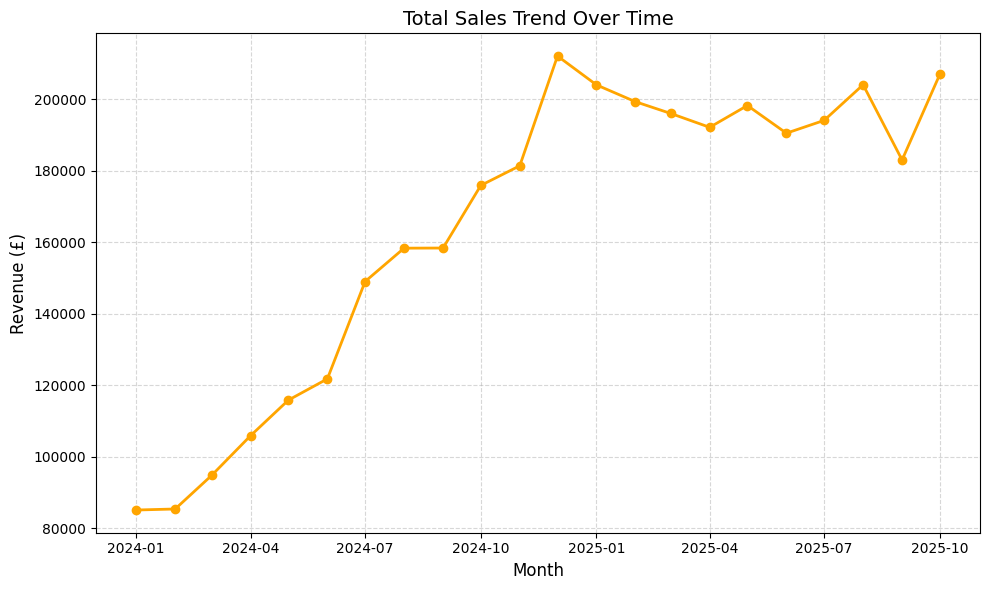

In [196]:
import matplotlib.pyplot as plt

# Aggregate total monthly revenue (all territories combined)
sales_trend = (
    df_clean_combined
    .groupby("month", as_index=False)["revenue"]
    .sum()
    .sort_values("month")
)

# Convert month from 'YYYY-MM' to datetime for proper sorting/plotting
sales_trend["month_dt"] = pd.to_datetime(sales_trend["month"], errors="coerce")

# Plot total sales trend over time
plt.figure(figsize=(10,6))
plt.plot(sales_trend["month_dt"], sales_trend["revenue"], marker="o", linewidth=2, color="orange")
plt.title("Total Sales Trend Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue (£)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#### Top 5 territories by revenue

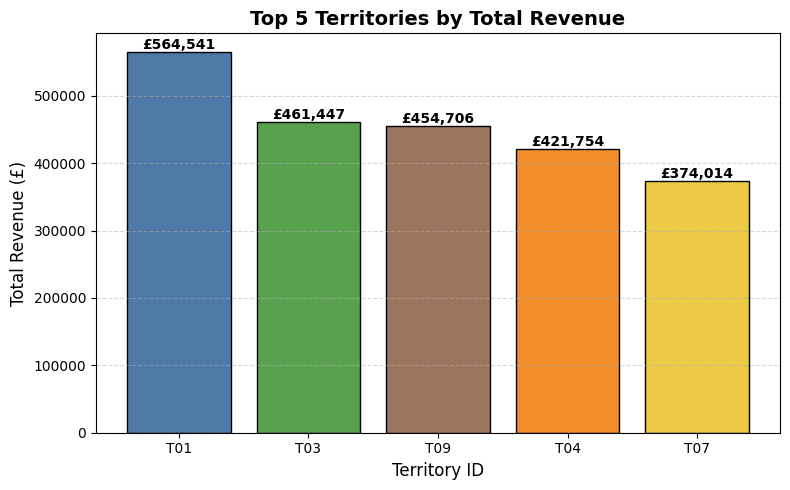

In [198]:
# Aggregate total revenue by territory
top_territories = (
    df_clean_combined
    .groupby("territory_id", as_index=False)["revenue"]
    .sum()
    .sort_values("revenue", ascending=False)
)

# Select Top 5
top_5 = top_territories.head(5)

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(
    top_5["territory_id"],
    top_5["revenue"],
    color=["#4e79a7", "#59a14f", "#9c755f", "#f28e2b", "#edc948"],
    edgecolor="black"
)

# Add labels and title
plt.title("Top 5 Territories by Total Revenue", fontsize=14, weight="bold")
plt.xlabel("Territory ID", fontsize=12)
plt.ylabel("Total Revenue (£)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Annotate revenue values on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"£{height:,.0f}",
        ha="center",
        va="bottom",
        fontsize=10,
        weight="bold"
    )

plt.tight_layout()
plt.show()

#### Marketing vs Sales correlation

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Aggregate monthly data per product & territory
marketing_sales = (
    df_clean_combined
    .groupby(["product_id", "territory_id", "month"], as_index=False)
    .agg({
        "revenue": "sum",
        "spend_total_gbp": "first"   # only one value per month kept earlier
    })
    .dropna(subset=["revenue", "spend_total_gbp"])
)

# 2️⃣ Compute overall correlation
corr_value = marketing_sales["revenue"].corr(marketing_sales["spend_total_gbp"])
print(f"Overall correlation between marketing spend and sales revenue: {corr_value:.3f}")


Overall correlation between marketing spend and sales revenue: -0.020


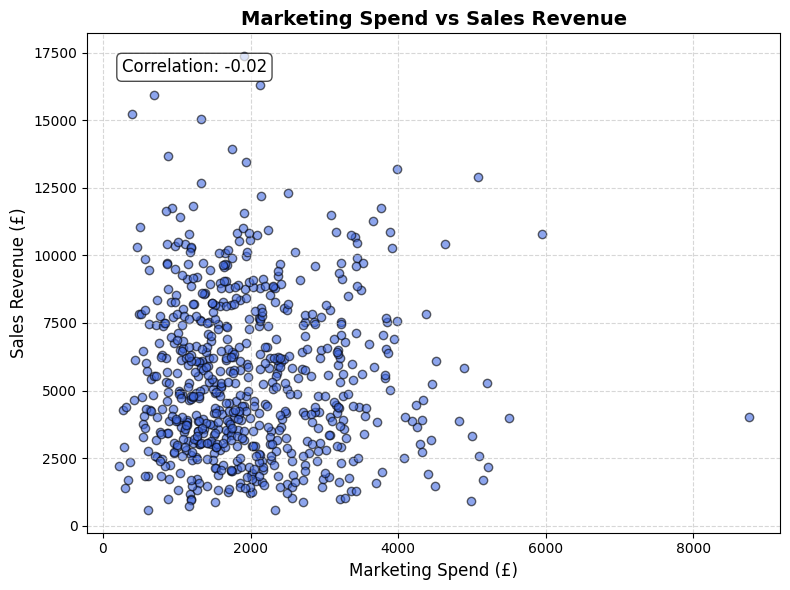

In [200]:
plt.figure(figsize=(8,6))
plt.scatter(
    marketing_sales["spend_total_gbp"],
    marketing_sales["revenue"],
    alpha=0.6,
    color="royalblue",
    edgecolors="black"
)

plt.title("Marketing Spend vs Sales Revenue", fontsize=14, weight="bold")
plt.xlabel("Marketing Spend (£)", fontsize=12)
plt.ylabel("Sales Revenue (£)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

# Optional: Add correlation text on chart
plt.text(
    0.05, 0.95,
    f"Correlation: {corr_value:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.7)
)

plt.tight_layout()
plt.show()


#### Inventory vs Shipments balance

In [205]:


# Aggregate monthly totals per product + territory
inv_ship = (
    df_clean_combined
    .groupby(["product_id", "territory_id", "month"], as_index=False)
    .agg({
        "on_hand_units": "mean",     # avg monthly inventory
        "qty_units_ship": "sum"      # total monthly shipments
    })
)

#  Compute inventory-to-shipment ratio
inv_ship["inv_ship_ratio"] = np.where(
    inv_ship["qty_units_ship"] > 0,
    inv_ship["on_hand_units"] / inv_ship["qty_units_ship"],
    np.nan
)

# Flag imbalances
inv_ship["balance_status"] = np.where(
    inv_ship["inv_ship_ratio"] < 0.8, "Understocked",     # inventory too low vs shipments
    np.where(inv_ship["inv_ship_ratio"] > 1.5, "Overstocked", "Balanced")
)

#  Summary
balance_summary = (
    inv_ship["balance_status"]
    .value_counts()
    .rename_axis("Inventory-Shipments Balance")
    .reset_index(name="Count")
)

print(" Inventory vs Shipments Summary:")
print(balance_summary.head())


 Inventory vs Shipments Summary:
  Inventory-Shipments Balance  Count
0                Understocked    559
1                    Balanced     77
2                 Overstocked     24


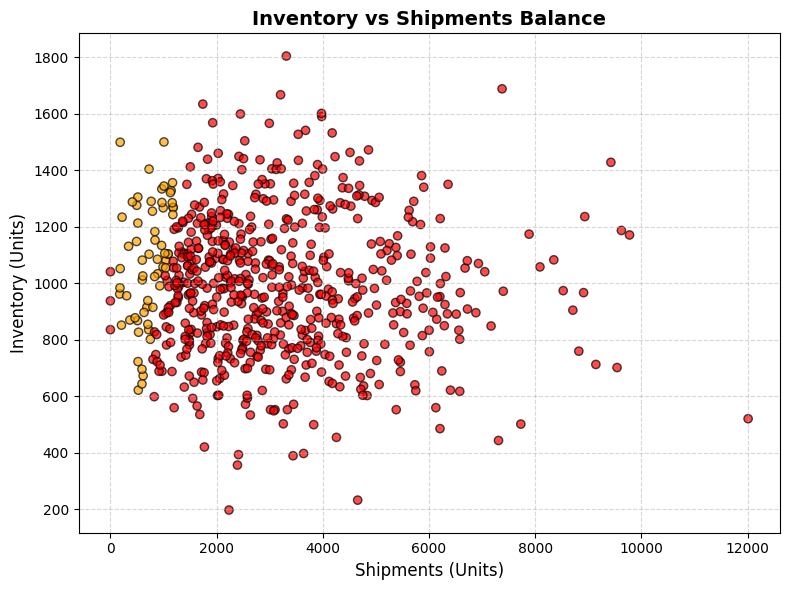

In [212]:
plt.figure(figsize=(8,6))
plt.scatter(
    inv_ship["qty_units_ship"],
    inv_ship["on_hand_units"],
    c=np.where(inv_ship["inv_ship_ratio"] > 1, "orange", "red"),
    alpha=0.7,
    edgecolors="black"
)

plt.title("Inventory vs Shipments Balance", fontsize=14, weight="bold")
plt.xlabel("Shipments (Units)", fontsize=12)
plt.ylabel("Inventory (Units)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


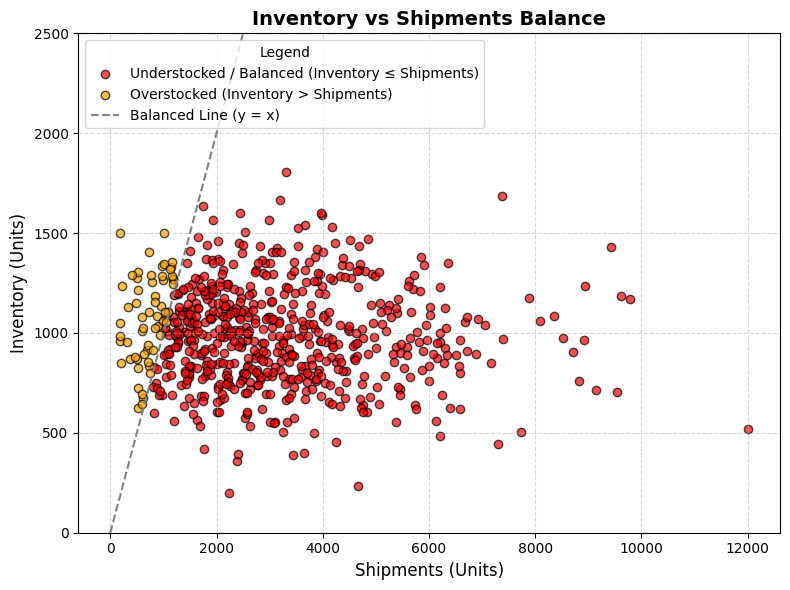

In [217]:

plt.figure(figsize=(8,6))

# Split the data for clear color categories
overstocked = inv_ship[inv_ship["inv_ship_ratio"] > 1]
understocked = inv_ship[inv_ship["inv_ship_ratio"] <= 1]

#  Plot both groups
plt.scatter(
    understocked["qty_units_ship"], understocked["on_hand_units"],
    color="red", edgecolors="black", alpha=0.7,
    label="Understocked / Balanced (Inventory ≤ Shipments)"
)

plt.scatter(
    overstocked["qty_units_ship"], overstocked["on_hand_units"],
    color="orange", edgecolors="black", alpha=0.7,
    label="Overstocked (Inventory > Shipments)"
)
#  Add diagonal reference line (perfect balance)
max_val = max(inv_ship["qty_units_ship"].max(), inv_ship["on_hand_units"].max())
plt.plot(
    [0, max_val], [0, max_val],
    color="gray", linestyle="--", linewidth=1.5,
    label="Balanced Line (y = x)"
)

#  Limit the Y-axis to focus on your real range
plt.ylim(0, 2500)

# Add labels, title, legend, and grid
plt.title("Inventory vs Shipments Balance", fontsize=14, weight="bold")
plt.xlabel("Shipments (Units)", fontsize=12)
plt.ylabel("Inventory (Units)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Legend", loc="upper left", frameon=True)
plt.tight_layout()
plt.show()
